<h3><b>1)Import Libraries and Load dataset</b></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv("../data/raw/fetal_health.csv")
df.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


<h3><b>2) Data Exploration and Data Cleaning</b></h3>

In [3]:
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.iloc[0]) - 1}")
print(f"Classes in target(fetal_health): {df["fetal_health"].unique()}")

Number of records: 2126
Number of features: 21
Classes in target(fetal_health): [2. 1. 3.]


In [4]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**Remove duplicate records**

In [5]:
#finding duplicate records
dup_boolean = df.duplicated()
print(f"Number of duplicate records: {dup_boolean.sum()}")
df.drop_duplicates(inplace = True)
print(f"Number of records after droping duplicates: {len(df)}")

Number of duplicate records: 13
Number of records after droping duplicates: 2113


**Class Distribution**

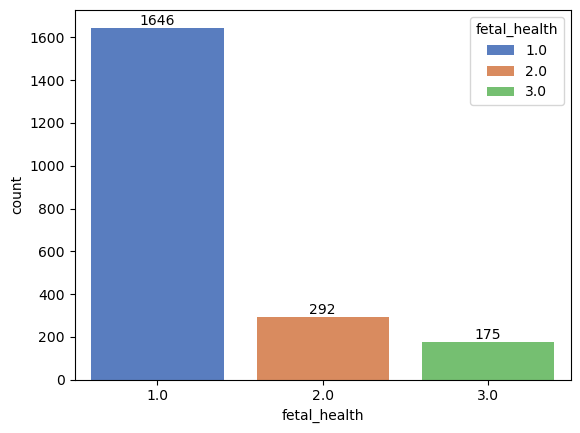

In [6]:
#Visualize class distribution
#1 -> Normal, 2 -> Suspect, 3 -> Pathological
ax = sns.countplot(data = df, x = "fetal_health", hue = "fetal_health", palette = "muted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Outlier Analysis using IQR method(except target)

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["fetal_health"])
Y = df["fetal_health"]

# Outlier Detection Using IQR
def find_outliers_iqr(data):
    outlier_count = {}
    numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_count[col] = len(outliers)

    for i, (feature, count) in enumerate(outlier_count.items(), start=1):
        if count > 0:
            print(f"{i} '{feature}': {count} outliers found")
        else:
            print(f"{i} '{feature}': No outliers found")

find_outliers_iqr(X)

  

1 'baseline value': No outliers found
2 'accelerations': 14 outliers found
3 'fetal_movement': 305 outliers found
4 'uterine_contractions': 1 outliers found
5 'light_decelerations': 150 outliers found
6 'severe_decelerations': 7 outliers found
7 'prolongued_decelerations': 178 outliers found
8 'abnormal_short_term_variability': No outliers found
9 'mean_value_of_short_term_variability': 70 outliers found
10 'percentage_of_time_with_abnormal_long_term_variability': 305 outliers found
11 'mean_value_of_long_term_variability': 71 outliers found
12 'histogram_width': No outliers found
13 'histogram_min': No outliers found
14 'histogram_max': 24 outliers found
15 'histogram_number_of_peaks': 19 outliers found
16 'histogram_number_of_zeroes': 502 outliers found
17 'histogram_mode': 73 outliers found
18 'histogram_mean': 45 outliers found
19 'histogram_median': 28 outliers found
20 'histogram_variance': 184 outliers found
21 'histogram_tendency': No outliers found


<h3><b>3)Feature Scaling & splitting dataset</b></h3>

**70|15|15 train-test-validation split**

In [8]:
from sklearn.model_selection import train_test_split

#Splitting data into 70% training and 30% temporary 
x_train, x_temp, y_train, y_temp = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

#Splitting 30% temporary into 15% validation and 15% test
x_cv, x_test, y_cv, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("\nShape of x_cv (validation):", x_cv.shape)
print("Shape of y_cv (validation):", y_cv.shape)
print("\nShape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (1479, 21)
Shape of y_train: (1479,)

Shape of x_cv (validation): (317, 21)
Shape of y_cv (validation): (317,)

Shape of x_test: (317, 21)
Shape of y_test: (317,)


**Feature Scaling with Z-score normalization**

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_cv_scaled = scaler.transform(x_cv)

<h3><b>4)Model Training & Evaluation</b></h3>

<h4><b>1. RandomForest</b></h4>

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
SEED = 55

In [11]:
params_grid = {
    "n_estimators": [100, 150, 200, 250],
    "max_depth": [4, 6, 8, 10, 12, None],
    "min_samples_split": [2, 3, 4, 5]
}
randomForest = RandomForestClassifier(random_state = SEED)
grid_search = GridSearchCV(randomForest , params_grid, scoring = "accuracy", cv = 5, n_jobs = -1,)
grid_search.fit(x_train_scaled, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
joblib.dump(best_model, "../models/random_forest.pkl")
print(classification_report(y_train, best_model.predict(x_train_scaled)))
print(best_params)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1152
         2.0       0.99      0.98      0.99       204
         3.0       1.00      0.99      1.00       123

    accuracy                           1.00      1479
   macro avg       1.00      0.99      0.99      1479
weighted avg       1.00      1.00      1.00      1479

{'max_depth': None, 'min_samples_split': 4, 'n_estimators': 150}


**RandomForest Evaluation**

In [13]:
##Testing on Validation set
print("Validation results: ")
print(classification_report(y_cv, best_model.predict(x_cv_scaled)))
print("Test results: ")
print(classification_report(y_test, best_model.predict(x_test_scaled)))
print(accuracy_score(y_test, best_model.predict(x_test_scaled)))

Validation results: 
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       247
         2.0       0.85      0.75      0.80        44
         3.0       0.96      0.88      0.92        26

    accuracy                           0.94       317
   macro avg       0.92      0.87      0.90       317
weighted avg       0.94      0.94      0.94       317

Test results: 
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       247
         2.0       0.89      0.73      0.80        44
         3.0       1.00      0.96      0.98        26

    accuracy                           0.95       317
   macro avg       0.95      0.89      0.92       317
weighted avg       0.95      0.95      0.94       317

0.9463722397476341


**RandomForest AUC-SCORE**

In [14]:
from sklearn.metrics import roc_auc_score
y_prob = best_model.predict_proba(x_test_scaled)#returns prob of each class
auc_macro = roc_auc_score(y_test, y_prob, multi_class = "ovr", average = "macro")
auc_weighted = roc_auc_score(y_test, y_prob, multi_class = "ovr", average = "weighted")
print(f"Macro AUC-Score: {auc_macro:.4f}")
print(f"Weighted AUC-Score: {auc_weighted:.4f}")

Macro AUC-Score: 0.9879
Weighted AUC-Score: 0.9870


<h4><b>2 .Gradient Boosting</b></h4>

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
params_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5, None]
}
gradBoost = GradientBoostingClassifier(random_state = SEED)
grid_search = GridSearchCV(gradBoost , params_grid, scoring = "accuracy", cv = 5, n_jobs = -1,)
grid_search.fit(x_train_scaled, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
joblib.dump(best_model, "../models/grad_boost.pkl")
print(classification_report(y_train, best_model.predict(x_train_scaled)))
print(best_params)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1152
         2.0       1.00      1.00      1.00       204
         3.0       1.00      1.00      1.00       123

    accuracy                           1.00      1479
   macro avg       1.00      1.00      1.00      1479
weighted avg       1.00      1.00      1.00      1479

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150}


**Gradient Boost Evaluation**

In [17]:
print("Validation results: ")
print(classification_report(y_cv, best_model.predict(x_cv_scaled)))
print("Test results: ")
print(classification_report(y_test, best_model.predict(x_test_scaled)))
print(accuracy_score(y_test, best_model.predict(x_test_scaled)))

Validation results: 
              precision    recall  f1-score   support

         1.0       0.97      1.00      0.98       247
         2.0       0.92      0.80      0.85        44
         3.0       0.96      0.92      0.94        26

    accuracy                           0.96       317
   macro avg       0.95      0.90      0.93       317
weighted avg       0.96      0.96      0.96       317

Test results: 
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       247
         2.0       0.91      0.73      0.81        44
         3.0       1.00      0.92      0.96        26

    accuracy                           0.95       317
   macro avg       0.95      0.88      0.91       317
weighted avg       0.95      0.95      0.94       317

0.9463722397476341


**AUC-SCORE**

In [18]:
from sklearn.metrics import roc_auc_score
y_prob = best_model.predict_proba(x_test_scaled)#returns prob of each class
auc_macro = roc_auc_score(y_test, y_prob, multi_class = "ovr", average = "macro")
auc_weighted = roc_auc_score(y_test, y_prob, multi_class = "ovr", average = "weighted")
print(f"Macro AUC-Score: {auc_macro:.4f}")
print(f"Weighted AUC-Score: {auc_weighted:.4f}")

Macro AUC-Score: 0.9885
Weighted AUC-Score: 0.9864


<h4><b>3 .KNN</b></h4>

In [19]:
from sklearn.neighbors import KNeighborsClassifier

#  KNN Training & Tuning 
params_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, params_grid, scoring="accuracy", cv=5, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train) 

best_model_knn = grid_search.best_estimator_
best_params_knn = grid_search.best_params_
joblib.dump(best_model_knn, "../models/knn_model.pkl")
print("Training Classification Report (KNN)")
print(classification_report(y_train, best_model_knn.predict(x_train_scaled)))
print("Best Hyperparameters:", best_params_knn)

Training Classification Report (KNN)
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1152
         2.0       1.00      1.00      1.00       204
         3.0       1.00      1.00      1.00       123

    accuracy                           1.00      1479
   macro avg       1.00      1.00      1.00      1479
weighted avg       1.00      1.00      1.00      1479

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


KNN Evaluation

In [20]:
# KNN Evaluation 
print("Validation Results (KNN): ")
print(classification_report(y_cv, best_model_knn.predict(x_cv_scaled)))

print("Test Results (KNN):")
print(classification_report(y_test, best_model_knn.predict(x_test_scaled)))

Validation Results (KNN): 
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       247
         2.0       0.80      0.75      0.78        44
         3.0       0.95      0.69      0.80        26

    accuracy                           0.93       317
   macro avg       0.90      0.81      0.85       317
weighted avg       0.93      0.93      0.93       317

Test Results (KNN):
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       247
         2.0       0.77      0.68      0.72        44
         3.0       0.92      0.85      0.88        26

    accuracy                           0.92       317
   macro avg       0.88      0.83      0.85       317
weighted avg       0.92      0.92      0.92       317



AUC SCORE

In [21]:
#  KNN AUC Score 
y_prob_knn = best_model_knn.predict_proba(x_test_scaled)
auc_macro_knn = roc_auc_score(y_test, y_prob_knn, multi_class="ovr", average="macro")
auc_weighted_knn = roc_auc_score(y_test, y_prob_knn, multi_class="ovr", average="weighted")

print(f"Macro AUC-Score (KNN): {auc_macro_knn:.4f}")
print(f"Weighted AUC-Score (KNN): {auc_weighted_knn:.4f}")

Macro AUC-Score (KNN): 0.9678
Weighted AUC-Score (KNN): 0.9639


<h4><b>4 .LOGISTIC REGRESSION</b></h4>

In [22]:
from sklearn.linear_model import LogisticRegression

#  Logistic Regression Training & Tuning 
params_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear'] 
}

log_reg = LogisticRegression(random_state=SEED, max_iter=2000)
grid_search = GridSearchCV(log_reg, params_grid, scoring="accuracy", cv=5, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

best_model_log_reg = grid_search.best_estimator_
best_params_log_reg = grid_search.best_params_
joblib.dump(best_model_log_reg, "../models/logistic_model.pkl")
print("Training Classification Report (Logistic Regression)")
print(classification_report(y_train, best_model_log_reg.predict(x_train_scaled)))
print("Best Hyperparameters:", best_params_log_reg)

Training Classification Report (Logistic Regression)
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95      1152
         2.0       0.68      0.65      0.67       204
         3.0       0.88      0.80      0.83       123

    accuracy                           0.90      1479
   macro avg       0.83      0.80      0.82      1479
weighted avg       0.90      0.90      0.90      1479

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Evaluation

In [23]:
# Logistic Regression Evaluation 
print("Validation Results (Logistic Regression):")
print(classification_report(y_cv, best_model_log_reg.predict(x_cv_scaled)))

print("\nTest Results (Logistic Regression):")
print(classification_report(y_test, best_model_log_reg.predict(x_test_scaled)))

Validation Results (Logistic Regression):
              precision    recall  f1-score   support

         1.0       0.92      0.97      0.94       247
         2.0       0.62      0.57      0.60        44
         3.0       0.94      0.65      0.77        26

    accuracy                           0.89       317
   macro avg       0.83      0.73      0.77       317
weighted avg       0.88      0.89      0.88       317


Test Results (Logistic Regression):
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       247
         2.0       0.64      0.61      0.63        44
         3.0       0.92      0.85      0.88        26

    accuracy                           0.90       317
   macro avg       0.83      0.80      0.82       317
weighted avg       0.89      0.90      0.89       317



AUC score

In [24]:
# Logistic Regression AUC Score 
y_prob_log_reg = best_model_log_reg.predict_proba(x_test_scaled)
auc_macro_log_reg = roc_auc_score(y_test, y_prob_log_reg, multi_class="ovr", average="macro")
auc_weighted_log_reg = roc_auc_score(y_test, y_prob_log_reg, multi_class="ovr", average="weighted")

print(f"Macro AUC-Score (Logistic Regression): {auc_macro_log_reg:.4f}")
print(f"Weighted AUC-Score (Logistic Regression): {auc_weighted_log_reg:.4f}")

Macro AUC-Score (Logistic Regression): 0.9678
Weighted AUC-Score (Logistic Regression): 0.9698


<h4><b>5 .ANN</b></h4>

In [25]:
from sklearn.neural_network import MLPClassifier

#  ANN Training & Tuning 
params_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01], # L2 regularization term
    'learning_rate': ['constant', 'adaptive'],
}

ann = MLPClassifier(random_state=SEED, max_iter=1500) 
grid_search = GridSearchCV(ann, params_grid, scoring="accuracy", cv=5, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train) 

best_model_ann = grid_search.best_estimator_
best_params_ann = grid_search.best_params_
joblib.dump(best_model_ann, "../models/MLP_model.pkl")

print("Training Classification Report (ANN)")
print(classification_report(y_train, best_model_ann.predict(x_train_scaled)))
print("Best Hyperparameters:", best_params_ann)

Training Classification Report (ANN)
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1152
         2.0       0.99      1.00      1.00       204
         3.0       1.00      0.99      1.00       123

    accuracy                           1.00      1479
   macro avg       1.00      1.00      1.00      1479
weighted avg       1.00      1.00      1.00      1479

Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}


Evaluation

In [26]:
# ANN Evaluation 
print("Validation Results (ANN):")
print(classification_report(y_cv, best_model_ann.predict(x_cv_scaled)))

print("\n Test Results (ANN) :")
print(classification_report(y_test, best_model_ann.predict(x_test_scaled)))

Validation Results (ANN):
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       247
         2.0       0.69      0.61      0.65        44
         3.0       0.91      0.77      0.83        26

    accuracy                           0.91       317
   macro avg       0.85      0.78      0.81       317
weighted avg       0.90      0.91      0.90       317


 Test Results (ANN) :
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.96       247
         2.0       0.68      0.73      0.70        44
         3.0       0.88      0.85      0.86        26

    accuracy                           0.91       317
   macro avg       0.84      0.84      0.84       317
weighted avg       0.91      0.91      0.91       317



AUC Scores

In [27]:
# ANN AUC Score 
y_prob_ann = best_model_ann.predict_proba(x_test_scaled)
auc_macro_ann = roc_auc_score(y_test, y_prob_ann, multi_class="ovr", average="macro")
auc_weighted_ann = roc_auc_score(y_test, y_prob_ann, multi_class="ovr", average="weighted")

print(f"Macro AUC-Score (ANN): {auc_macro_ann:.4f}")
print(f"Weighted AUC-Score (ANN): {auc_weighted_ann:.4f}")

Macro AUC-Score (ANN): 0.9775
Weighted AUC-Score (ANN): 0.9780


<h4><b>6. Support Vector Machine</b></h4>

In [28]:
from sklearn.svm import SVC

In [29]:
params_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
}
svc = SVC(random_state = SEED)
grid_search = GridSearchCV(svc , params_grid, scoring = "accuracy", cv = 5, n_jobs = -1,)
grid_search.fit(x_train_scaled, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
joblib.dump(best_model, "../models/svm_model.pkl")
print(classification_report(y_train, best_model.predict(x_train_scaled)))
print(best_params)

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      1152
         2.0       0.97      0.97      0.97       204
         3.0       1.00      0.98      0.99       123

    accuracy                           0.99      1479
   macro avg       0.99      0.98      0.99      1479
weighted avg       0.99      0.99      0.99      1479

{'C': 100, 'kernel': 'rbf'}


In [30]:
print("Validation results: ")
print(classification_report(y_cv, best_model.predict(x_cv_scaled)))
print("Test results: ")
print(classification_report(y_test, best_model.predict(x_test_scaled)))

Validation results: 
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       247
         2.0       0.79      0.70      0.75        44
         3.0       0.91      0.81      0.86        26

    accuracy                           0.93       317
   macro avg       0.89      0.83      0.86       317
weighted avg       0.92      0.93      0.93       317

Test results: 
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       247
         2.0       0.78      0.73      0.75        44
         3.0       0.92      0.92      0.92        26

    accuracy                           0.92       317
   macro avg       0.88      0.87      0.88       317
weighted avg       0.92      0.92      0.92       317

